In [1]:
import numpy as np
import multiprocessing as mul
import matplotlib.pyplot as plt
from core.signal_bag import *
from core.stacking_analysis import *
from core.req_arrays import *

read icdata
read uptdata
read eadata
read mspdata


In [2]:
s1400data = mspdata[mspdata['S1400'] != '*']
s1400 = mspdata[mspdata['S1400'] != '*']['S1400'].values.astype(float)
d_DMdata = mspdata[mspdata['DIST_DM'] != '*']
d_DM = mspdata[mspdata['DIST_DM'] != '*']['DIST_DM'].values.astype(float)
w2 = 1/(d_DM**2)

In [3]:
corr = s1400data[s1400data['DIST_DM'] != '*']

corr.to_csv('/home/darkwake/Desktop/Valid Pulsars.csv')

In [4]:
s1400data[np.argmax(s1400):np.argmax(s1400)+1]

,NAME,RAJD,DECJD,P0,S1400,DIST,DIST_DM,Unnamed: 7
194,B0833-45,128.835881,-45.176354,0.089328,1050.00,0.280,0.328,NaN


In [5]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 22,
        'color':  'black',
        }
smallerfont = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 15,
        }

axesfont = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 18,
        }

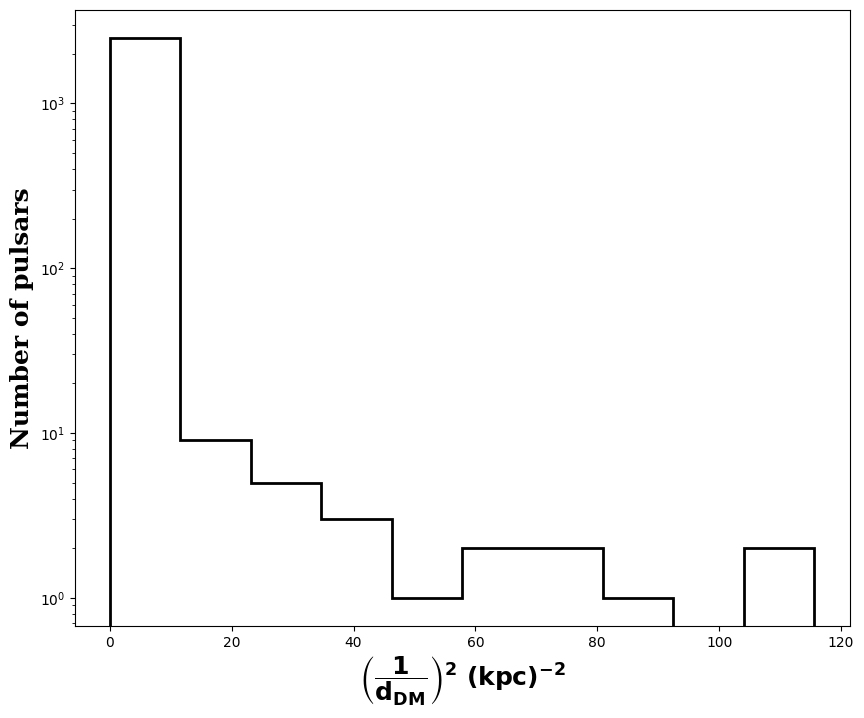

In [6]:
#FIG 1
plt.figure(figsize=(10, 8))
plt.hist(w2, bins=10, log=True, histtype='step', color='black', linewidth=2)
plt.xlabel(r'$\mathbf{\left(\dfrac{1}{d_{DM}}\right)^2}$ $\mathbf{(kpc)^{-2}}$', fontdict=axesfont)
# plt.text(0.5, 0.5, '$\mathbf{\left(\dfrac{1}{d_{DM}}\right)^2}$ $\mathbf{(kpc)^{-2}}$', fontsize=16, ha='center', va='center', usetex=True)
plt.ylabel('Number of pulsars', fontdict=axesfont)
# plt.xticks(np.arange(0, 200, 10))
# plt.xscale('log')
plt.savefig('./outputs/1_by_distDM2_hist.pdf', facecolor='white')
plt.show()

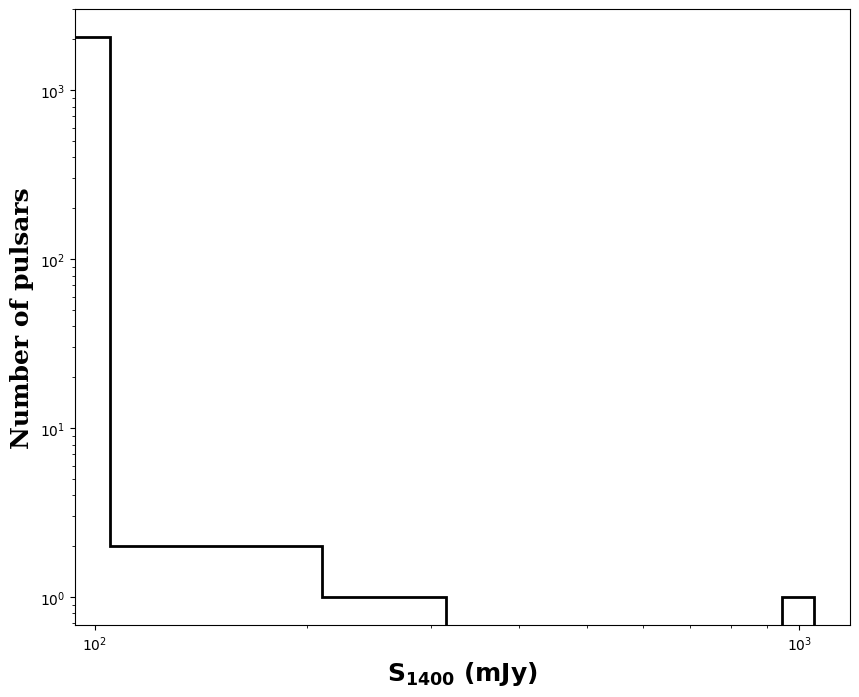

In [7]:
#FIG 2
plt.figure(figsize=(10, 8))
# plt.hist(s1400, 10, density=True)
plt.hist(s1400,bins=10,log=True, histtype='step', color='black', linewidth=2)
plt.xlabel('$\mathbf{S_{1400}}$ $\mathbf{(mJy)}$', fontdict=axesfont)
plt.ylabel('Number of pulsars', fontdict=axesfont)
# plt.xticks(np.arange(0, 200, 10))
plt.xscale('log')
plt.savefig('./outputs/s1400_hist.pdf', facecolor='white')
plt.show()

In [8]:
len(msra)

2627

In [9]:
np.median(s1400[s1400 < 1050])

0.31

In [10]:
np.mean(s1400)

2.0796025206010667

In [11]:
np.quantile(s1400, 0.95)

5.0

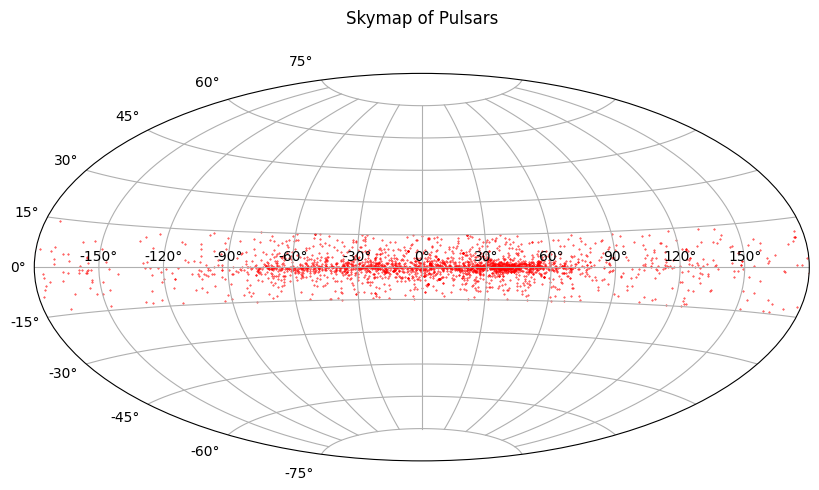

In [12]:
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u



# Convert the coordinates to SkyCoord object
coords = SkyCoord(ra=msra*u.deg, dec=msdec*u.deg, frame='icrs')

coords = coords.galactic

# Plot the Aitoff projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='aitoff')
ax.grid(True)

# Plot the pulsars
ax.scatter(coords.l.wrap_at(180*u.deg).radian, coords.b.wrap_at(180*u.deg).radian, marker='.', s=0.6, c='red', alpha=1)#, cmap='viridis', c=mspdata['S1400'].values.astype(float))

# Set the labels and title
# ax.set_xlabel('Galactic Latitute (l)')
# ax.set_ylabel('Declination (Dec)')
ax.set_title('Skymap of Pulsars\n\n')

# Show the plot
plt.savefig('./outputs/skymap.pdf', facecolor='white')
plt.show()

In [13]:
icdata[abs(icdata['Dec[deg]']) <=15]

,MJD[days],log10(E/GeV),AngErr[deg],RA[deg],Dec[deg],Azimuth[deg],Zenith[deg]
1,54562.386622,5.17,0.62,75.024,-13.371,349.100,76.646
2,54562.387892,3.92,0.56,97.501,11.290,327.060,101.291
7,54562.447482,3.11,1.17,115.220,-2.685,330.861,87.300
13,54562.505630,3.30,0.38,97.162,11.874,9.900,101.873
14,54562.518525,5.20,0.88,175.864,-11.793,295.858,78.162
...,...,...,...,...,...,...,...
1134418,58307.948193,3.04,2.49,275.449,8.998,82.510,99.008
1134419,58307.949229,3.22,0.52,201.891,14.231,156.440,104.134
1134423,58307.954504,2.97,0.42,254.573,12.855,105.672,102.828
1134427,58307.962666,2.94,1.23,191.547,4.415,171.627,94.312


In [14]:
np.count_nonzero(abs((180/np.pi)*coords.b.wrap_at(180*u.deg).radian) <= 15)

2627

In [15]:
mspdata[abs((180/np.pi)*coords.b.wrap_at(180*u.deg).radian) <= 15].to_csv('./data/ATNF_Gl_less_than_15.csv', index=False)

In [16]:
msp2 = mspdata[abs((180/np.pi)*coords.b.wrap_at(180*u.deg).radian) <= 15]

In [17]:
s1400data = msp2[msp2['S1400'] != '*']
s1400 = msp2[msp2['S1400'] != '*']['S1400'].values.astype(float)
d_DMdata = msp2[msp2['DIST_DM'] != '*']
d_DM = msp2[msp2['DIST_DM'] != '*']['DIST_DM'].values.astype(float)
w2 = 1/(d_DM**2)

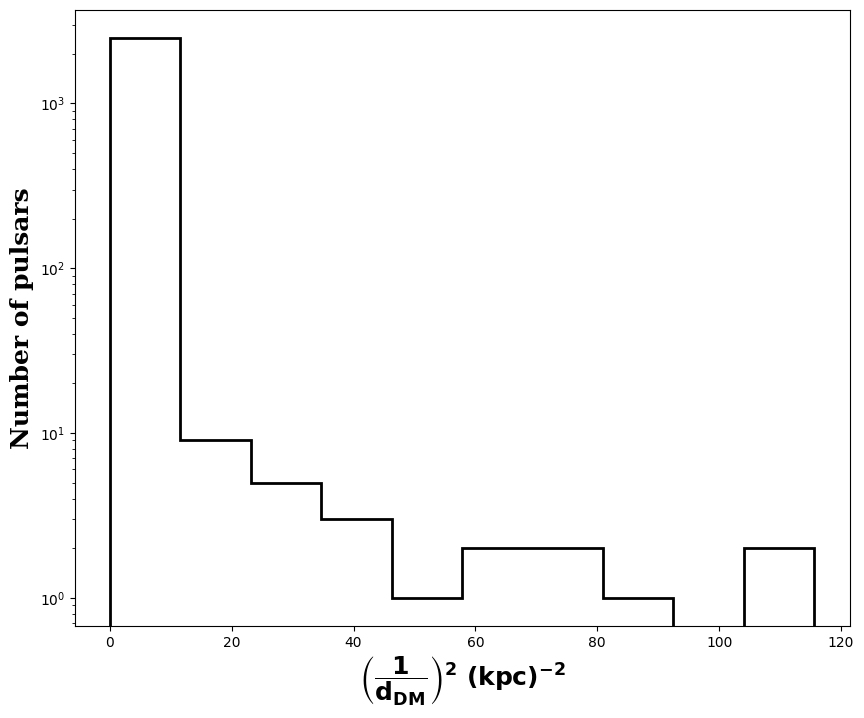

In [18]:
#FIG 1
plt.figure(figsize=(10, 8))
plt.hist(w2, bins=10, log=True, histtype='step', color='black', linewidth=2)
plt.xlabel(r'$\mathbf{\left(\dfrac{1}{d_{DM}}\right)^2}$ $\mathbf{(kpc)^{-2}}$', fontdict=axesfont)
# plt.text(0.5, 0.5, '$\mathbf{\left(\dfrac{1}{d_{DM}}\right)^2}$ $\mathbf{(kpc)^{-2}}$', fontsize=16, ha='center', va='center', usetex=True)
plt.ylabel('Number of pulsars', fontdict=axesfont)
# plt.xticks(np.arange(0, 200, 10))
# plt.xscale('log')
plt.savefig('./outputs/1_by_distDM2_hist.pdf', facecolor='white')
plt.show()

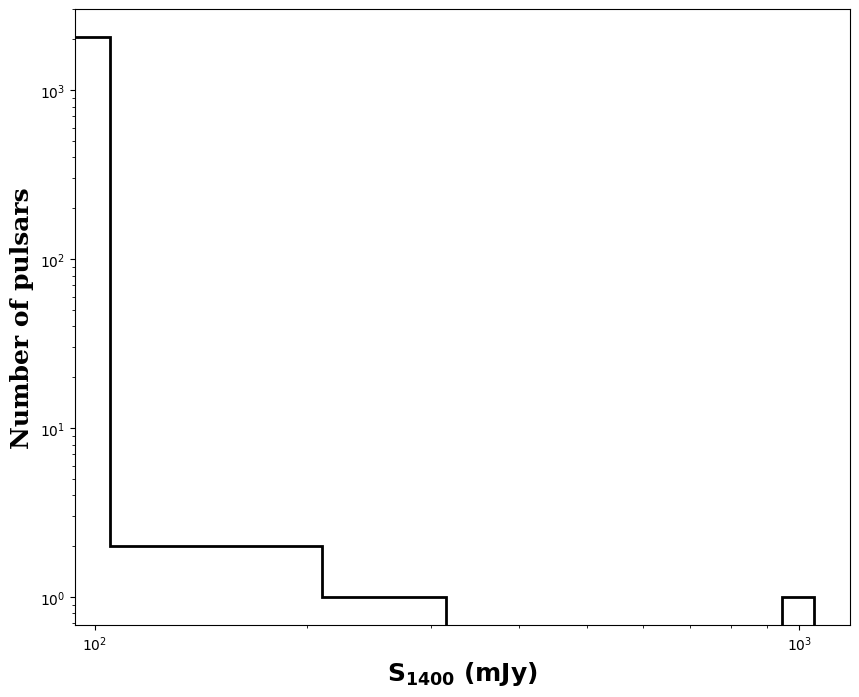

In [19]:
#FIG 2
plt.figure(figsize=(10, 8))
# plt.hist(s1400, 10, density=True)
plt.hist(s1400,bins=10,log=True, histtype='step', color='black', linewidth=2)
plt.xlabel('$\mathbf{S_{1400}}$ $\mathbf{(mJy)}$', fontdict=axesfont)
plt.ylabel('Number of pulsars', fontdict=axesfont)
# plt.xticks(np.arange(0, 200, 10))
plt.xscale('log')
plt.savefig('./outputs/s1400_hist.pdf', facecolor='white')
plt.show()

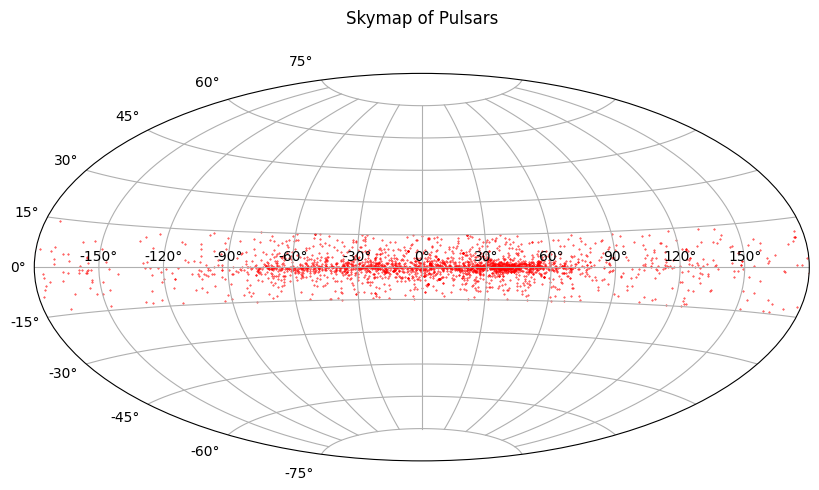

In [20]:
msp3 = msp2#d_DMdata[d_DMdata['S1400'] != '*']

msra = msp3['RAJD'].values.astype(float)
msdec = msp3['DECJD'].values.astype(float)


# Convert the coordinates to SkyCoord object
coords = SkyCoord(ra=msra*u.deg, dec=msdec*u.deg, frame='icrs')

coords = coords.galactic

# Plot the Aitoff projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='aitoff')
ax.grid(True)

# Plot the pulsars
ax.scatter(coords.l.wrap_at(180*u.deg).radian, coords.b.wrap_at(180*u.deg).radian, marker='.', s=0.6, c='red', alpha=1)#, cmap='viridis', c=mspdata['S1400'].values.astype(float))

# Set the labels and title
# ax.set_xlabel('Galactic Latitute (l)')
# ax.set_ylabel('Declination (Dec)')
ax.set_title('Skymap of Pulsars\n\n')

# Show the plot
# plt.savefig('./outputs/skymap.pdf', facecolor='white')
plt.show()